In [1]:
import numpy as np
import pandas as pd
from numpy import nan
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt 
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import datetime
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data_path=pd.read_csv("autos.csv", sep=',', header=0, encoding='cp1252')
data_path

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [3]:
data_path.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [4]:
train = pd.read_csv("autos.csv", sep=',', header=0, encoding='cp1252')

In [5]:
feature_names = ['yearOfRegistration','postalCode','fuelType']

In [6]:
df_train = pd.DataFrame()
print((train.groupby('yearOfRegistration')).size())

yearOfRegistration
1000    38
1001     1
1039     1
1111     4
1200     1
        ..
9000     5
9229     1
9450     1
9996     1
9999    27
Length: 155, dtype: int64


In [7]:
data_path.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [8]:
data_path=data_path.fillna('np.nan')
data_path

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,np.nan,1993,manuell,0,golf,150000,0,benzin,volkswagen,np.nan,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,np.nan,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,np.nan,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,np.nan,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,np.nan,volkswagen,np.nan,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [9]:
data_path.head()


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,np.nan,1993,manuell,0,golf,150000,0,benzin,volkswagen,np.nan,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,np.nan,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,np.nan,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [10]:
n_race={'andere':0,'benzin':1,'cng':2,'diesel':3,'elektro':4,'hybrid':5,'lpg':6,np.nan:7}

In [11]:
def clean_ra(x):
    return n_race[x]
df_train['fuelType']=train['fuelType'].apply(clean_ra)
df_train['yearOfRegistration']=train['yearOfRegistration']
df_train['postalCode']=train['postalCode']
df_train['price']=train['price']






In [12]:
df_train.head()

,fuelType,yearOfRegistration,postalCode,price
0,1,1993,70435,480
1,3,2011,66954,18300
2,3,2004,90480,9800
3,1,2001,91074,1500
4,3,2008,60437,3600


In [13]:
X = df_train[feature_names]

In [14]:
X.head(10)


,yearOfRegistration,postalCode,fuelType
0,1993,70435,1
1,2011,66954,3
2,2004,90480,3
3,2001,91074,1
4,2008,60437,3
5,1995,33775,1
6,2004,67112,1
7,1980,19348,1
8,2014,94505,1
9,1998,27472,7


In [15]:
y = df_train.price

In [16]:
print(y)

0           480
1         18300
2          9800
3          1500
4          3600
          ...  
371523     2200
371524     1199
371525     9200
371526     3400
371527    28990
Name: price, Length: 371528, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [18]:
X_train.head(10)

,yearOfRegistration,postalCode,fuelType
125626,2002,19395,1
361249,2008,38114,1
69678,2001,38226,1
206084,1997,1328,1
274547,1997,6779,3
149969,2008,68169,1
302994,2004,47226,1
286990,2009,53639,1
134561,2006,47574,3
54990,2005,93059,3


In [19]:
X_test.head(10)

,yearOfRegistration,postalCode,fuelType
343052,2007,35398,1
60407,2011,92709,3
101992,2005,4347,7
75240,2012,22297,1
141055,2006,49565,6
322513,2017,89250,7
172210,2000,22119,7
111900,1999,22089,1
359741,1959,46509,1
249129,2005,67688,3


In [20]:
Y_train.head(10)

125626        0
361249    16500
69678       999
206084      320
274547      500
149969    12300
302994     2900
286990    11450
134561     5500
54990      7990
Name: price, dtype: int64

In [21]:
Y_test.head(10)

343052     2850
60407     11990
101992     7000
75240     17750
141055     3400
322513     1900
172210        0
111900     1350
359741     2000
249129      500
Name: price, dtype: int64

In [22]:
from sklearn.preprocessing import PolynomialFeatures
def create_polynomial_regression_model(degree):
  #"Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)

  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))  

In [23]:
#create_polynomial_regression_model(degree):
 #   "Creates a polynomial regression model for the given degree"
  
    #  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
 # X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  #poly_model = LinearRegression()
  #poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  #y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  #y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  #rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
  #r2_train = r2_score(Y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  #rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  #r2_test = r2_score(Y_test, y_test_predict)
  
  #print("The model performance for the training set")
  #print("-------------------------------------------")
  #print("RMSE of training set is {}".format(rmse_train))
  #print("R2 score of training set is {}".format(r2_train))
  
  #print("\n")
  
 # print("The model performance for the test set")
 # print("-------------------------------------------")
  #print("RMSE of test set is {}".format(rmse_test))
  #print("R2 score of test set is {}".format(r2_test))


In [24]:
x= df_train['yearOfRegistration']
x

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

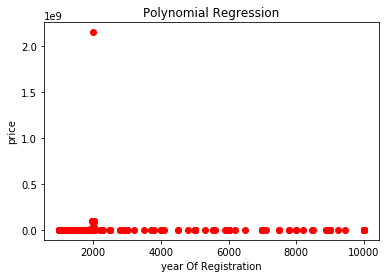

In [25]:
plt.scatter(x, y, color = 'red') 
  

plt.title('Polynomial Regression') 
plt.xlabel('year Of Registration') 
plt.ylabel('price') 
  
plt.show() 

In [27]:
create_polynomial_regression_model(4)

The model performance for the training set
-------------------------------------------
RMSE of training set is 3989195.828986312
R2 score of training set is 0.00034398336569541055


The model performance for the test set
-------------------------------------------
RMSE of test set is 834898.4305945728
R2 score of test set is -0.009763938097718361
